In [3]:
import tensorflow as tf                                     # 텐서플로 모듈 가져와서 tf라고 할께
from tensorflow import keras                               # 텐서플로로부터 keras 모듈 불러와줘
 
import numpy as np                                         # 넘파이 모듈 가져와서 np라고 할께  
import matplotlib.pyplot as plt                            # 맷플롯 모듈 가져와서 plt라고 할께
import os                                                   # 운영체제 불러와줘

 
print(tf.__version__)                                       # 텐서플로의 버전은?

2.6.0


In [4]:
mnist = keras.datasets.mnist                                # mnist 는 keras에 내장된 데이터 값을 불러온듯?

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()    # 데이터를 트레이닝값, 테스트값의 행렬로 만든 건가 봄

In [6]:
print(len(x_train))                                         # 학습시킬 데이터 개수는?

60000


In [7]:
import pandas as pd                                        # 혹시몰라서 판다스 불러옴

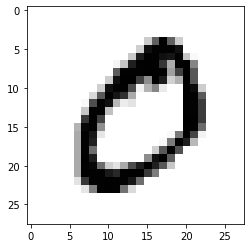

In [12]:
plt.imshow(x_train[1], cmap=plt.cm.binary)                  # 그림파일 읽는 메서드인가봄... 아직 모르겠다
plt.show()                                                  # x에는 그림파일이 있는것을 확인함

In [13]:
print(y_train[1])                                           # x그림 - y숫자로 되어있는 것을 확인함

0


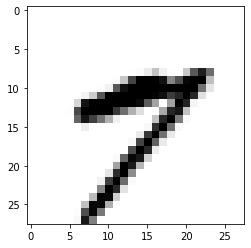

1126 번째 이미지 숫자는 바로 7 입니다


In [14]:
index=1125
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print((index+1), '번째 이미지 숫자는 바로', y_train[index], '입니다')         # 대충 인덱스로 되어있는거 보니 리스트인가봄

In [15]:
print(x_train.shape)                                                          #그림파일.shape로 개수, 각 픽셀 정보 확인하나봄

(60000, 28, 28)


In [16]:
print(x_test.shape)

(10000, 28, 28)


In [17]:
print('최소값',np.min(x_train), '최대값',np.max(x_train))                    #넘파이 메서드.min = 최소값, max = 최대값

최소값 0 최대값 255


In [18]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0                  # 편의를 위해 정규화, 근데 이거 사람아니라 컴퓨터도 필요해?

In [20]:
print('최소값',np.min(x_train_norm), '최대값',np.max(x_train_norm))

최소값 0.0 최대값 1.0


In [21]:
model=keras.models.Sequential()                          #Sequenrial 이라는 모델을 불러옴 (안에 매커니즘은 모름)

In [22]:
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))       #16가지 특성,  변수 범주 3by3?   렐?루,  입력이미지 형태


In [23]:
model.add(keras.layers.MaxPool2D(2,2))

In [24]:
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))       #이미지 특성 개수를 바꿔서 해봄

In [25]:
model.add(keras.layers.MaxPooling2D(2,2))                          #ing가 붙은거보니 뭔가 변한듯

In [27]:
model.add(keras.layers.Flatten())

In [28]:
model.add(keras.layers.Dense(32, activation='relu'))            # 32개의 뉴런이 노드를 만드는듯, 높을수록 복잡

In [31]:
model.add(keras.layers.Dense(10, activation='softmax'))         # 10가지 클래스로 구분한다고 함

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [33]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))    # 초기 shape에 (데이터개수, 이미지크기 X 이미지크기, 채널)
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))      # 흑백사진은 채널 1을 사용


Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)


In [34]:
x_train_reshaped=x_train_norm.reshape(-1, 28, 28, 1)
x_test_reshaped=x_test_norm.reshape(-1, 28, 28, 1)            #알아서 1씩 빼면서 값을 넣어주는건가?

In [35]:
print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])                         # 여긴 진짜 모르겠다.

In [39]:
model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2097 - accuracy: 0.9343
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0716 - accuracy: 0.9780
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0514 - accuracy: 0.9841
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0415 - accuracy: 0.9871
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0346 - accuracy: 0.9889
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0281 - accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0243 - accuracy: 0.9922
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0206 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0174 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.014

In [40]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)

313/313 - 1s - loss: 0.0350 - accuracy: 0.9903


In [44]:
print("test_loss: {}".format(test_loss))

test_loss: 0.03502554073929787


In [45]:
print("test_accuracy: {}".format(test_accuracy))

test_accuracy: 0.9902999997138977


In [46]:
predicted_result = model.predict(x_test_reshaped)               #model이 추론한 확률값 (확률분포인듯?)

In [49]:
predicted_labels = np.argmax(predicted_result, axis=1)          #중에 젤 높은 것의 범주를 출력 

In [53]:
idx=0
print('model.predict() 결과 :', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 것 :', predicted_labels[idx])
print('실제 데이터의 레이블 :', y_test[idx])

model.predict() 결과 : [1.5985661e-10 2.2866958e-08 4.4788990e-09 2.1828056e-07 7.4848440e-11
 9.0062202e-12 1.6394935e-17 9.9999976e-01 9.9202779e-10 8.4889051e-10]
model이 추론한 가장 가능성이 높은 것 : 7
실제 데이터의 레이블 : 7


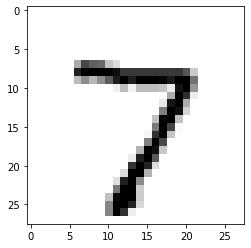

In [54]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

In [55]:
import random                              #random 모듈 불러오고

In [56]:
wrong_predict_list=[]                      #잘못된 예측을 리스트로 만들꺼임

In [57]:
for i, _ in enumerate(predicted_labels):    # i로 나열된 예측된 레이블들에서
    if predicted_labels[i] != y_test[i]:    # 추론한 결과와 실제 데이터 레이블이 다르면
        wrong_predict_list.append(i)         # 리스트에 넣어줘

In [58]:
samples = random.choices(population=wrong_predict_list, k=5)   #랜덤으로 전체 틀린거 모집단에서 표본 5개를 뽑음

예측확률분포:[2.3300499e-06 7.3279829e-05 4.7280486e-09 9.4684851e-01 5.0745289e-12
 3.1828787e-02 5.4745392e-08 2.1236036e-02 1.1018733e-05 1.7293980e-09]
레이블:5, 예측결과;3


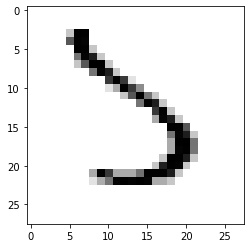

예측확률분포:[7.0275033e-05 2.8726869e-05 2.8217492e-01 2.7486235e-03 3.8733499e-05
 4.7025166e-09 7.1368518e-08 7.0373893e-01 1.0965698e-02 2.3395964e-04]
레이블:2, 예측결과;7


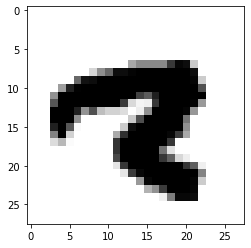

예측확률분포:[8.67888400e-12 1.20001677e-02 8.06372389e-02 3.23542833e-01
 1.66940466e-02 1.12359994e-04 1.69365577e-10 2.32493296e-01
 3.25433284e-01 9.08677932e-03]
레이블:3, 예측결과;8


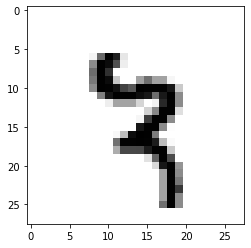

예측확률분포:[2.3426948e-14 1.4425530e-09 8.5852576e-13 5.6668210e-01 1.7156930e-13
 4.3316093e-01 1.6629409e-10 4.9395590e-09 1.5001990e-04 6.9227926e-06]
레이블:5, 예측결과;3


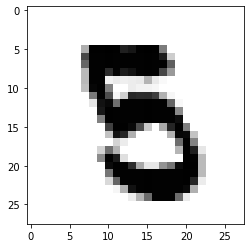

예측확률분포:[7.8520215e-01 1.9721733e-07 5.4504733e-05 6.0564470e-02 2.0292182e-06
 1.3916898e-01 1.3794440e-04 1.4262662e-02 4.5074776e-04 1.5635187e-04]
레이블:5, 예측결과;0


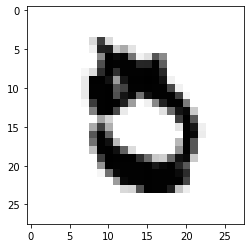

In [64]:
for n in samples:
    print("예측확률분포:" + str(predicted_result[n]))
    print("레이블:"+ str(y_test[n])+ ", 예측결과;"+ str(predicted_labels[n]))
    plt.imshow(x_test[n],cmap=plt.cm.binary)
    plt.show()

In [68]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(6, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(30, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_5 (Dense)              (None, 30)               

In [69]:
model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1761 - accuracy: 0.9467
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0510 - accuracy: 0.9842
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0351 - accuracy: 0.9891
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0264 - accuracy: 0.9921
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0204 - accuracy: 0.9933
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0155 - accuracy: 0.9949
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0137 - accuracy: 0.9955
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0105 - accuracy: 0.9963
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0083 - accuracy: 0.9972
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.008

In [70]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


313/313 - 1s - loss: 0.0391 - accuracy: 0.9908
test_loss: 0.039068590849637985 
test_accuracy: 0.9908000230789185


In [72]:
from PIL import Image
import glob

In [211]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    print(len(images), " images to be resized.")
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    print(len(images), " images resized.")
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

935  images to be resized.
935  images resized.


In [212]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

1385  images to be resized.
1385  images resized.


In [213]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    print(len(images), " images to be resized.")
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    print(len(images), " images resized.")
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

1365  images to be resized.
1365  images resized.


In [82]:
import numpy as np

In [214]:
def load_data(img_path, number_of_data=3685):
    img_size=28
    color=3
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    
    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [104]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3685 입니다.
x_train shape: (3685, 28, 28, 3)
y_train shape: (3685,)


라벨:  0


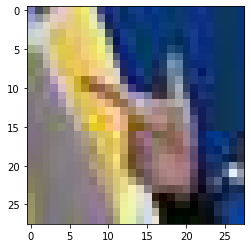

In [109]:
plt.imshow(x_train[1])
print('라벨: ', y_train[1])

In [88]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [207]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(10, (4,4), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(20, (4,4), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(20, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 25, 25, 10)        490       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 9, 9, 20)          3220      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 4, 4, 20)          0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 320)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 20)                6420      
_________________________________________________________________
dense_57 (Dense)             (None, 3)               

In [150]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))  

Before Reshape - x_train_norm shape: (3685, 28, 28, 3)
Before Reshape - x_test_norm shape: (300, 28, 28, 3)


In [208]:
model.fit(x_train_norm, y_train, epochs=15)

Epoch 1/15
116/116 [==============================] - 1s 3ms/step - loss: 0.9128 - accuracy: 0.5986
Epoch 2/15
116/116 [==============================] - 0s 3ms/step - loss: 0.5526 - accuracy: 0.8022
Epoch 3/15
116/116 [==============================] - 0s 3ms/step - loss: 0.3872 - accuracy: 0.8719
Epoch 4/15
116/116 [==============================] - 0s 3ms/step - loss: 0.2764 - accuracy: 0.9180
Epoch 5/15
116/116 [==============================] - 0s 3ms/step - loss: 0.2107 - accuracy: 0.9422
Epoch 6/15
116/116 [==============================] - 0s 3ms/step - loss: 0.1590 - accuracy: 0.9596
Epoch 7/15
116/116 [==============================] - 0s 3ms/step - loss: 0.1290 - accuracy: 0.9661
Epoch 8/15
116/116 [==============================] - 0s 3ms/step - loss: 0.1128 - accuracy: 0.9691
Epoch 9/15
116/116 [==============================] - 0s 3ms/step - loss: 0.0846 - accuracy: 0.9783
Epoch 10/15
116/116 [==============================] - 0s 3ms/step - loss: 0.0709 - accuracy: 0.9821

In [114]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    print(len(images), " images to be resized.")
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    print(len(images), " images resized.")
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/test/scissor"
resize_images(image_dir_path)


100  images to be resized.
100  images resized.


In [115]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    print(len(images), " images to be resized.")
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    print(len(images), " images resized.")
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/test/rock"
resize_images(image_dir_path)


100  images to be resized.
100  images resized.


In [116]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    print(len(images), " images to be resized.")
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    print(len(images), " images resized.")
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/test/paper"
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [215]:
def load_data(img_path, number_of_data=300):
    img_size=28
    color=3
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    
    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [123]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [209]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.4256 - accuracy: 0.5967
test_loss: 1.4256248474121094 
test_accuracy: 0.596666693687439


라벨:  0


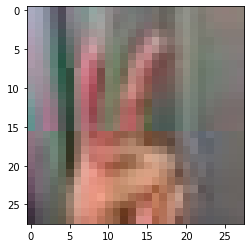

In [210]:
plt.imshow(x_test[12])
print('라벨: ', y_test[12])